# Data Manipulation and Statistics in H2O
## Jose M Albornoz
### December 2018

This notebook illustrates data manipulation and statistics functionality in H2O

In [1]:
import h2o

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm
style.use('fivethirtyeight')
%matplotlib inline

import pandas as pd

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.191-b12, mixed mode)
  Starting server from c:\users\albornoj\appdata\local\programs\python\python37\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\AlbornoJ\AppData\Local\Temp\tmp4bngfd3t
  JVM stdout: C:\Users\AlbornoJ\AppData\Local\Temp\tmp4bngfd3t\h2o_AlbornoJ_started_from_python.out
  JVM stderr: C:\Users\AlbornoJ\AppData\Local\Temp\tmp4bngfd3t\h2o_AlbornoJ_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,Europe/London
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_AlbornoJ_vqs18e
H2O cluster total nodes:,1
H2O cluster free memory:,3.531 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


# 1.- Import airlines dataset

In [3]:
url = "http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip"

In [4]:
airlines = h2o.import_file(url)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
airlines.shape

(43978, 31)

In [6]:
airlines.head()

Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
1987,10,14,3,741,730,912,849,PS,1451,NA,91,79,nan,23,11,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,15,4,729,730,903,849,PS,1451,NA,94,79,nan,14,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO
1987,10,17,6,741,730,918,849,PS,1451,NA,97,79,nan,29,11,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,18,7,729,730,847,849,PS,1451,NA,78,79,nan,-2,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,NO,NO
1987,10,19,1,749,730,922,849,PS,1451,NA,93,79,nan,33,19,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,21,3,728,730,848,849,PS,1451,NA,80,79,nan,-1,-2,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,NO,NO
1987,10,22,4,728,730,852,849,PS,1451,NA,84,79,nan,3,-2,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO
1987,10,23,5,731,730,902,849,PS,1451,NA,91,79,nan,13,1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,24,6,744,730,908,849,PS,1451,NA,84,79,nan,19,14,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,YES
1987,10,25,7,729,730,851,849,PS,1451,NA,82,79,nan,2,-1,SAN,SFO,447,nan,nan,0,NA,0,nan,nan,nan,nan,nan,YES,NO


In [7]:
airlines.summary()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,,1.0,,16.0,17.0,14.0,-63.0,-16.0,,,11.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,,
mean,1997.5000000000068,1.409090909090916,14.601073263904551,3.8206148528809845,1345.846661382077,1313.2228614307262,1504.634130378886,1485.2891673109345,,818.8429896766576,,124.8145291354039,125.02156260661906,114.31611109078231,9.317111936984306,10.007390655600112,,,730.1821905650557,5.381368059530588,14.16863418473208,0.024694165264450407,,0.0024785119832643593,4.047800291055639,0.2893764692712412,4.8550319041755365,0.0170155602821001,7.620060450016796,,
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,,3949.0,,475.0,437.0,402.0,475.0,473.0,,,3365.0,128.0,254.0,1.0,,1.0,369.0,201.0,323.0,14.0,373.0,,
sigma,6.344360901707349,1.8747113713439618,9.175790425861413,1.9050131191329014,465.3408991242322,476.2511399926005,484.3474879035152,492.75043412270105,,777.4043691636341,,73.97444166059017,73.40159463000951,69.6363295150612,29.840221962414837,26.438809042916418,,,578.4380082304235,4.201979939864826,9.905085747204279,0.15519314135784237,,0.049723487218862286,16.2057299044842,4.416779898734125,18.619776221475654,0.403940182101512,23.48756587410621,,
zeros,0,0,0,0,0,569,0,569,,0,,0,0,0,1514,6393,,,0,623,557,42892,,43869,7344,8840,7388,8914,7140,,
missing,0,0,0,0,1086,0,1195,0,0,0,32,1195,13,16649,1195,1086,0,0,35,16026,16024,0,9774,0,35045,35045,35045,35045,35045,0,0
0,1987.0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,PS,1451.0,NA,91.0,79.0,nan,23.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
1,1987.0,10.0,15.0,4.0,729.0,730.0,903.0,849.0,PS,1451.0,NA,94.0,79.0,nan,14.0,-1.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,NO
2,1987.0,10.0,17.0,6.0,741.0,730.0,918.0,849.0,PS,1451.0,NA,97.0,79.0,nan,29.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES


## 1.1- In case column transformation is required:

In [8]:
# data['xxx'] = data['xxx'].asfactor()
# data['xxx'] = data['xxx'].asnumeric()

# 2.- Some basic stats and data manipulation

In [9]:
airlines[:, 'AirTime'].mean()

[114.31611109078231]

In [10]:
airlines[:, 'AirTime'].summary()

,AirTime
type,int
mins,14.0
mean,114.31611109078231
maxs,402.0
sigma,69.6363295150612
zeros,0
missing,16649
0,nan
1,nan
2,nan


In [11]:
# this is a compatibility issue between h2o and matplotlib - need to use Matplotlib 2.2.3 or lower
# airlines[:, 'ArrDelay'].hist()
pdf_airlines = airlines.as_data_frame(use_pandas=True, header=True)

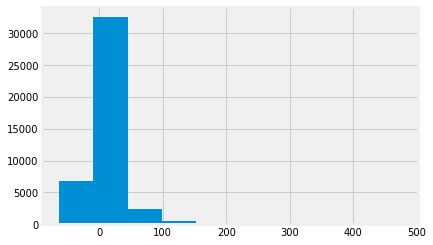

In [12]:
pdf_airlines.loc[:,'ArrDelay'].hist()

In [13]:
# looking for carriers with particular letters in its code
airlines[:, 'UniqueCarrier'].grep("[C-E]")

C1
17991
17992
17993
17994
17995
17996
17997
17998
17999
18000


In [14]:
tmp = airlines[:, 'UniqueCarrier']
tmp[tmp.grep("[C-E]", output_logical=True)]

UniqueCarrier
DL
DL
DL
DL
DL
DL
DL
DL
DL
DL


In [15]:
# correlation between columns
airlines[:, ['ArrDelay', 'DepDelay', 'AirTime']].cor(na_rm=True)

ArrDelay0,DepDelay0,AirTime0
1,0.907564,0.0836881
0.907564,1,0.0619647
0.0836881,0.0619647,1
